# Initialization, safe to ignore

In [2]:
%%capture
#In Azure notebooks, on first run per session, this package installation cell could take a considerable time to run
try:
    import music21
except:
    ! wget http://lilypond.org/download/binaries/linux-64/lilypond-2.18.2-1.linux-64.sh
    #then for forced (no prompts) install:
    !sh lilypond-2.18.2-1.linux-64.sh --batch
    !pip install music21

LILYPOND_PATH = '/home/nbuser/bin/lilypond'

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

%load_ext music21.ipython21

from IPython.display import Image

from music21 import *
environment.UserSettings()['lilypondPath']= LILYPOND_PATH

def render(s):
    return Image(filename=str(s.write(fmt='lily.png')))
try:
    import suntime
except:
    !pip install suntime
    
from suntime import Sun
from datetime import datetime

latitude = 48.0594021
longitude = 8.4640869

# Conditions
With conditions you can execute blocks based on the value of booleans. Normally the booleans are evaluated in place (e.g. variable > 100)

In [3]:
#Get the sun light times for our coordinate
sun = Sun(latitude, longitude)

if datetime.now().timestamp() > sun.get_local_sunset_time().timestamp():
    print ("Have a nice evening!")
elif datetime.now().timestamp() < sun.get_local_sunrise_time().timestamp():
    print("Good Morning!")
else:
    print("Have a nice day")

Have a nice day


# Loops
## General
In python there are two different kind of loops:
`for` an `while`
With a `for` loop you can execute code for a fixed set of times, whereas the `while` loop allows you to execute your code more flexible.
## For Loop

In [4]:
for x in range(5):
    print (x)

0
1
2
3
4


In [5]:
for c in 'Hello!':
    print (c)

H
e
l
l
o
!


In [6]:
for x in (0, 10, 21, 33):
    print (x)

0
10
21
33


## While Loop
With a while loop your code is executed as long as your condition is true.

In [7]:
i=0
while (i<5):
    print (i)
    i+=1

0
1
2
3
4


### Use the while loop for calculation
Here we calculate the factorial value = number! ($value = \prod \limits _{i=1} ^{number} i$)

In [12]:
value = 1
i=1
number=11
while (i<=number):
    value *= i#value=value*i
    i+=1#i=i+1
print ("The factorial of " + str(number) + " is " + str(value))

The factorial of 11 is 39916800


### Use nested for loop
You can always nest loops inside other loops, or conditions.

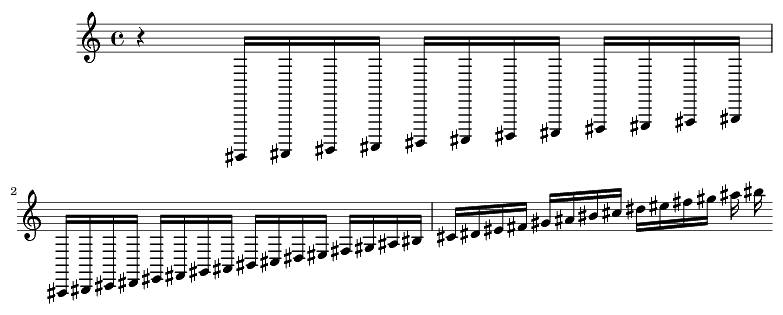

In [9]:
streamSequence = stream.Stream()
streamSequence.append(note.Rest())
for i in range(6):
    for n in ('c','d','e','f','g','a','b'):
        streamSequence.append(note.Note(n+'#'+str(i), quarterLength=0.25))
    
display(render(streamSequence))
streamSequence.show('midi')


### Combination of for loop and random
Using the random module you can generate a stream of random choices.

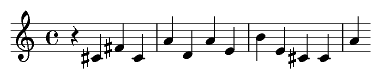

In [14]:
import random
streamRandom = stream.Stream()
streamRandom.append(note.Rest())
A_major = ('A','B','C#','D','E','F#','G#')
for i in range(12):
    streamRandom.append(note.Note(random.choice(A_major)))
display(render(streamRandom))
streamRandom.show('midi')

### No loop here, just an example

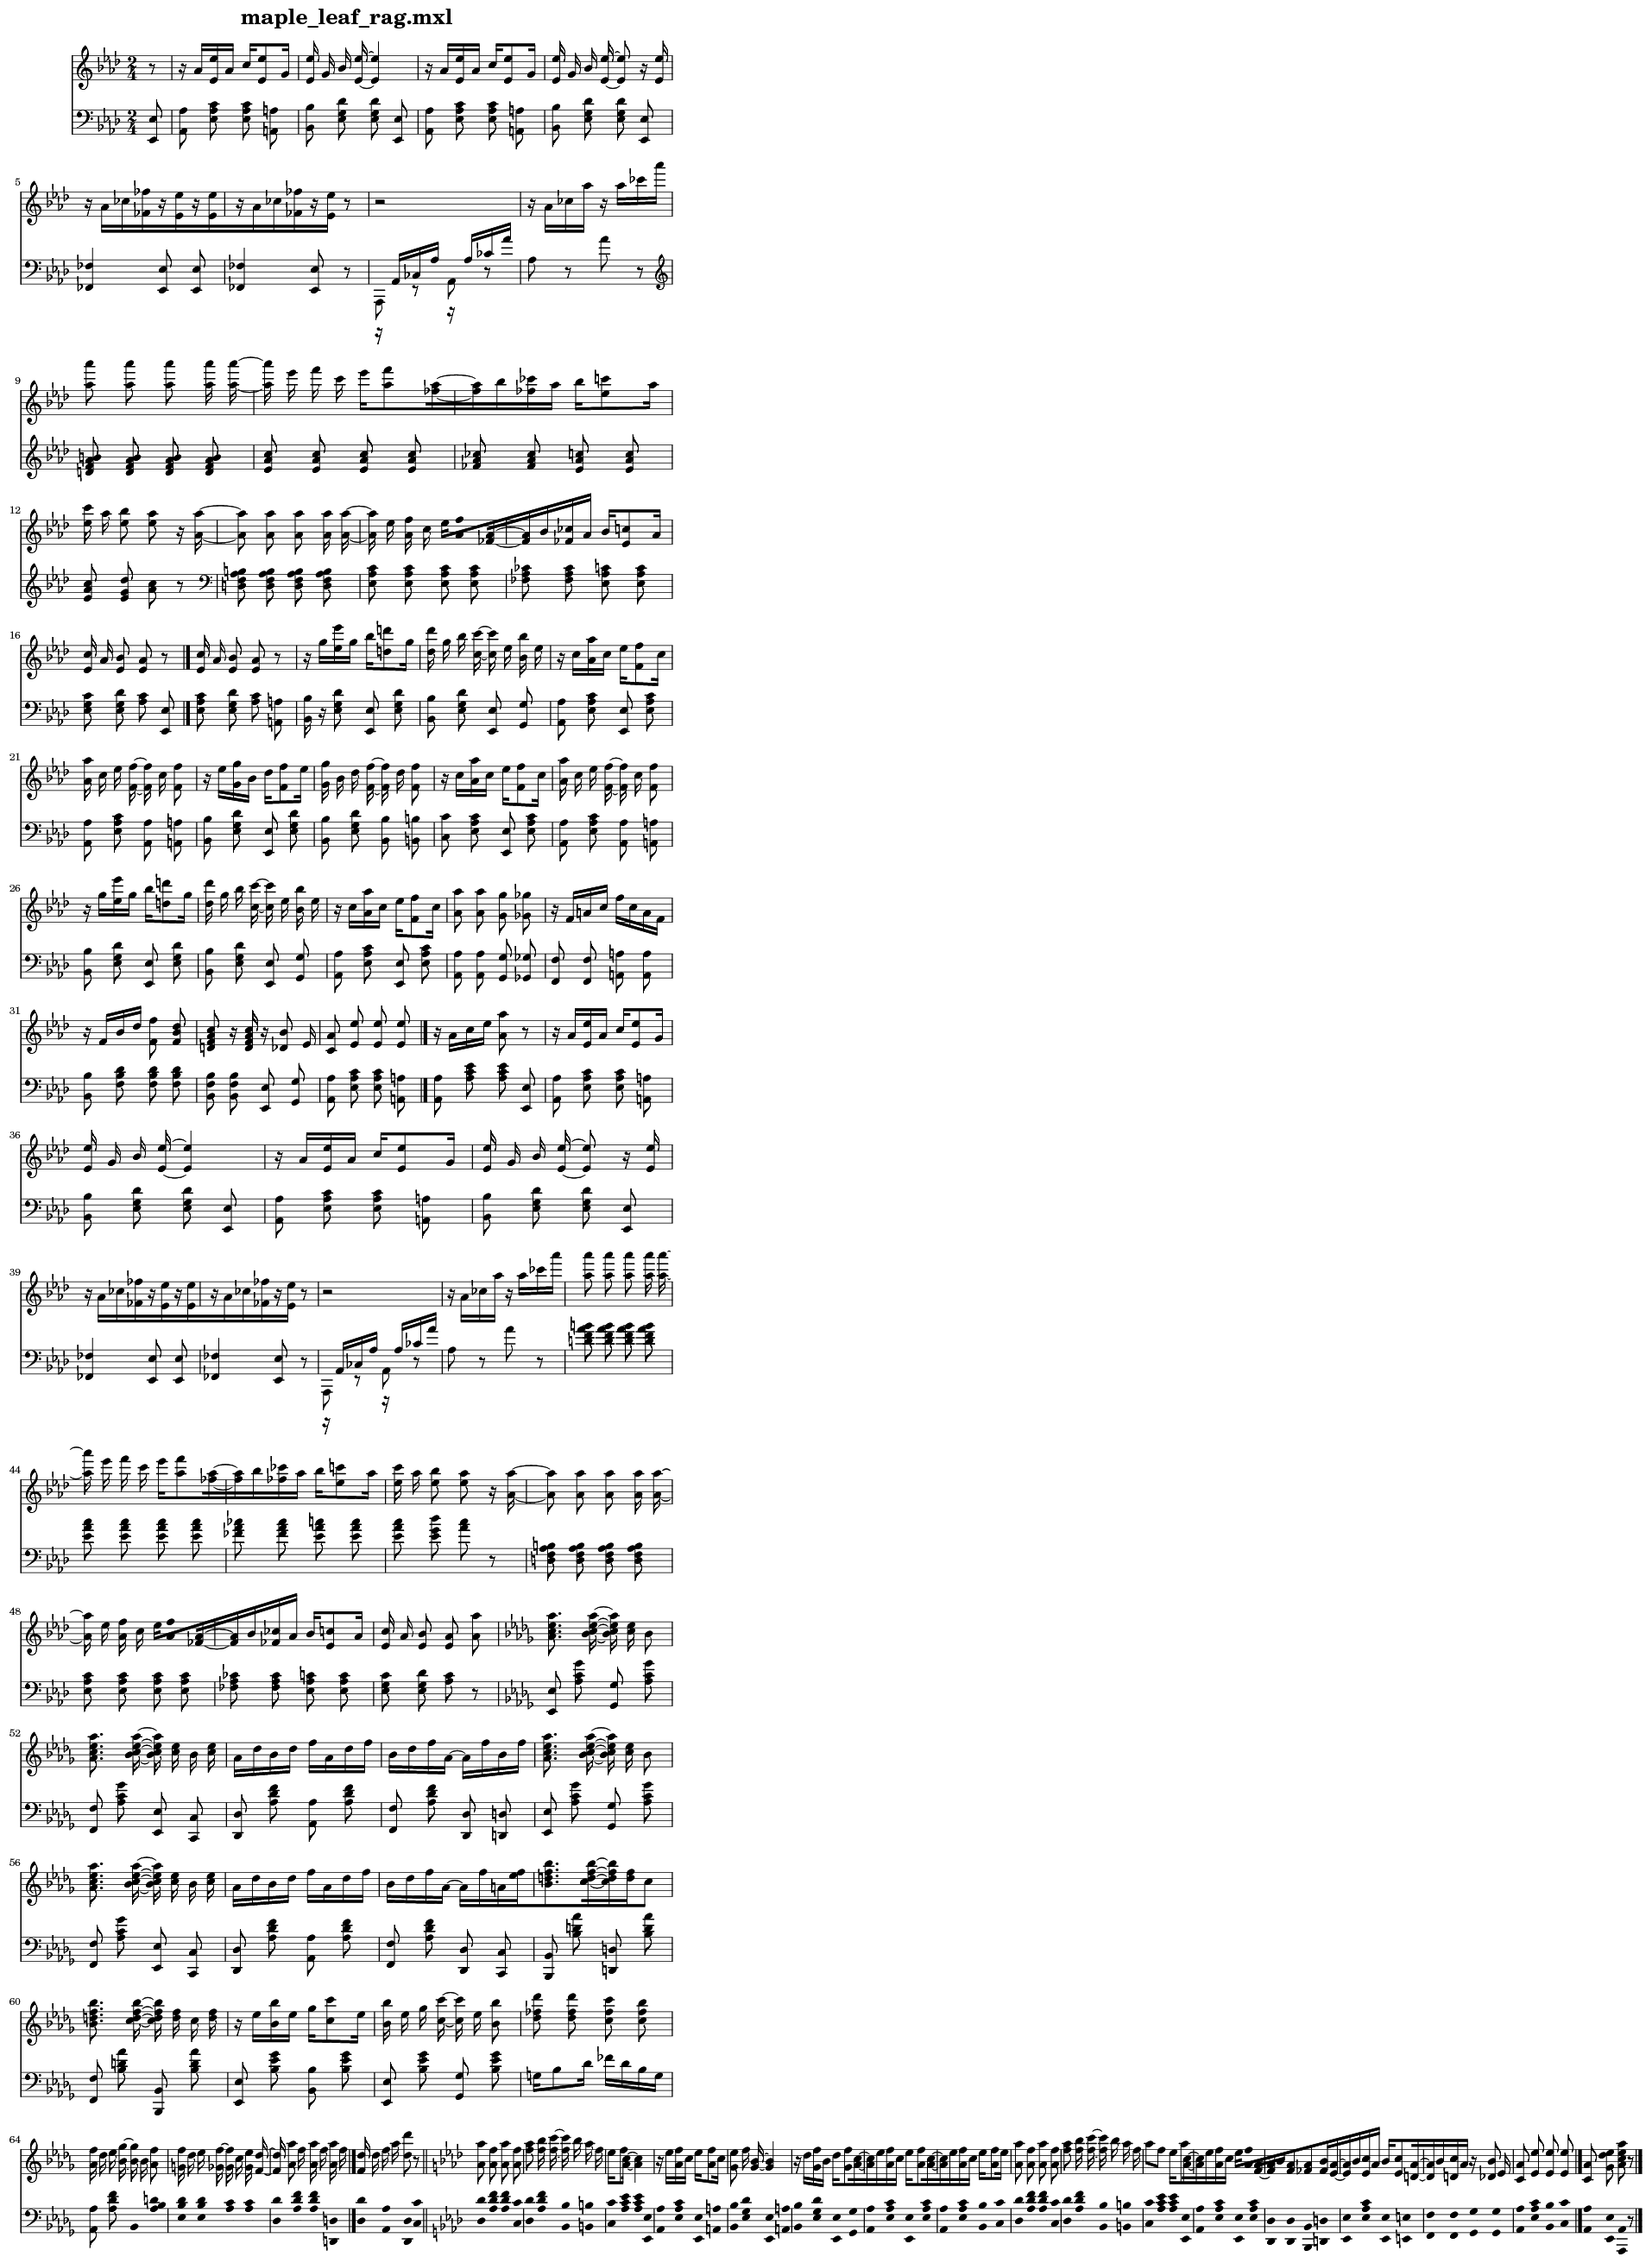

In [11]:
streamJoplin = corpus.parse('joplin/maple_leaf_rag.mxl')

display(render(streamJoplin))

streamJoplin.show('midi')